In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Loading Essential libraries 
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion 
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/cosmos/Downloads/Summary-dataset - db1.csv')

In [4]:
df = read_data()

In [4]:
df.head()

,Text,Summary
0,Core Qualifications\nDrafting\nSpace planning\...,Interior Designer with a distinct understandin...
1,Interior Designer with a distinct understandin...,Passionate personwith two years ofexperienceas...
2,The Mission ~ To work with ateamas designer or...,My career of 34 years includes the graphicart ...
3,Experience\nFreelance UX/UI InteractionDesigne...,Combined withwork experienceinArchitecture to ...
4,"Highlights\nAdobe Creative Suite(Illustrator, ...","Agraphic designer, who iscreativeand detail-or..."


In [6]:
df.tail()

,headlines,text
102910,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
102911,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
102912,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
102913,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...
102914,Madhesi Morcha withdraws support to Nepalese g...,"Madhesi Morcha, an alliance of seven political..."


### Lets do some text preprocessing 

In [9]:
import re
def rec_cleanning(Text):
    Text = re.sub('http\S+\s*',' ',Text)
    Text = re.sub('RT|cc',' ',Text)
    Text = re.sub('#\S+',' ',Text)
    Text = re.sub('@\S+',' ',Text)
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',Text)
    Text = re.sub(r'[^\x00-\x7f]',' ',Text)
    Text = re.sub('\s+',' ',Text)
    Text = Text.lower()
    return Text


df['Text'] = df['Text'].apply(lambda x: x.replace('\n',' '))
df['Summary'] = df['Summary'].apply(lambda x: x.replace('\n',' '))

df['Text'] = df['Text'].apply(lambda x: rec_cleanning(x))
df['Summary'] = df['Summary'].apply(lambda x: rec_cleanning(x))


In [10]:
!pip install text_hammer
import  text_hammer as th

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 KB 5.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textract 1.6.4 requires beautifulsoup4~=4.8.0, but you have beautifulsoup4 4.9.1 which is incompatible.
textract 1.6.4 requires six~=1.12.0, but you have six 1.16.0 which is incompatible.
Init Plugin
Init Graph Optimizer
Init Kernel


ModuleNotFoundError: No module named 'en_core_web_sm'

In [9]:
# Remove quotes 
def Text_cleaning(df, column):
    column = column
    print(column)
    import re
    """column must be a string value"""
    df[column] = df[column].progress_apply(lambda x: re.sub('"',"'", x))
    df[column] = df[column].progress_apply(lambda x:th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x:th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_urls(x))
    df[column] = df[column].progress_apply(lambda x:th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: re.sub('[^a-zA-Z]+',' ', x))
    df[column] = df[column].progress_apply(lambda x:' '.join([x for x in x.split() if len(x)>=2]) )
    return df[column]



In [10]:
cleaned_headlines= Text_cleaning(df, 'headlines')

headlines


  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

In [11]:
cleaned_text = Text_cleaning(df, 'text')

text


  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

  0%|          | 0/102915 [00:00<?, ?it/s]

In [12]:
cleaned_df = pd.DataFrame({'headlines':cleaned_headlines, 'text':cleaned_text})
cleaned_df.head()

,headlines,text
0,daman diu revokes mandatory rakshabandhan in o...,the administration of union territory daman an...
1,malaika slams user who trolled her for divorci...,malaika arora slammed an instagram user who tr...
2,virgin now corrected to unmarried in igims form,the indira gandhi institute of medical science...
3,aaj aapne pakad liya let man dujana before bei...,lashkaretaibas kashmir commander abu dujana wh...
4,hotel staff to get training to spot signs of s...,hotels in maharashtra will train their staff t...


In [13]:
cleaned_df.to_csv('newgroup_cleaned.csv', index = False)

In [74]:
cleaned_df = pd.read_csv('./newgroup_cleaned.csv')

### Some analysis to decide the max_len_headlines and max_len_text

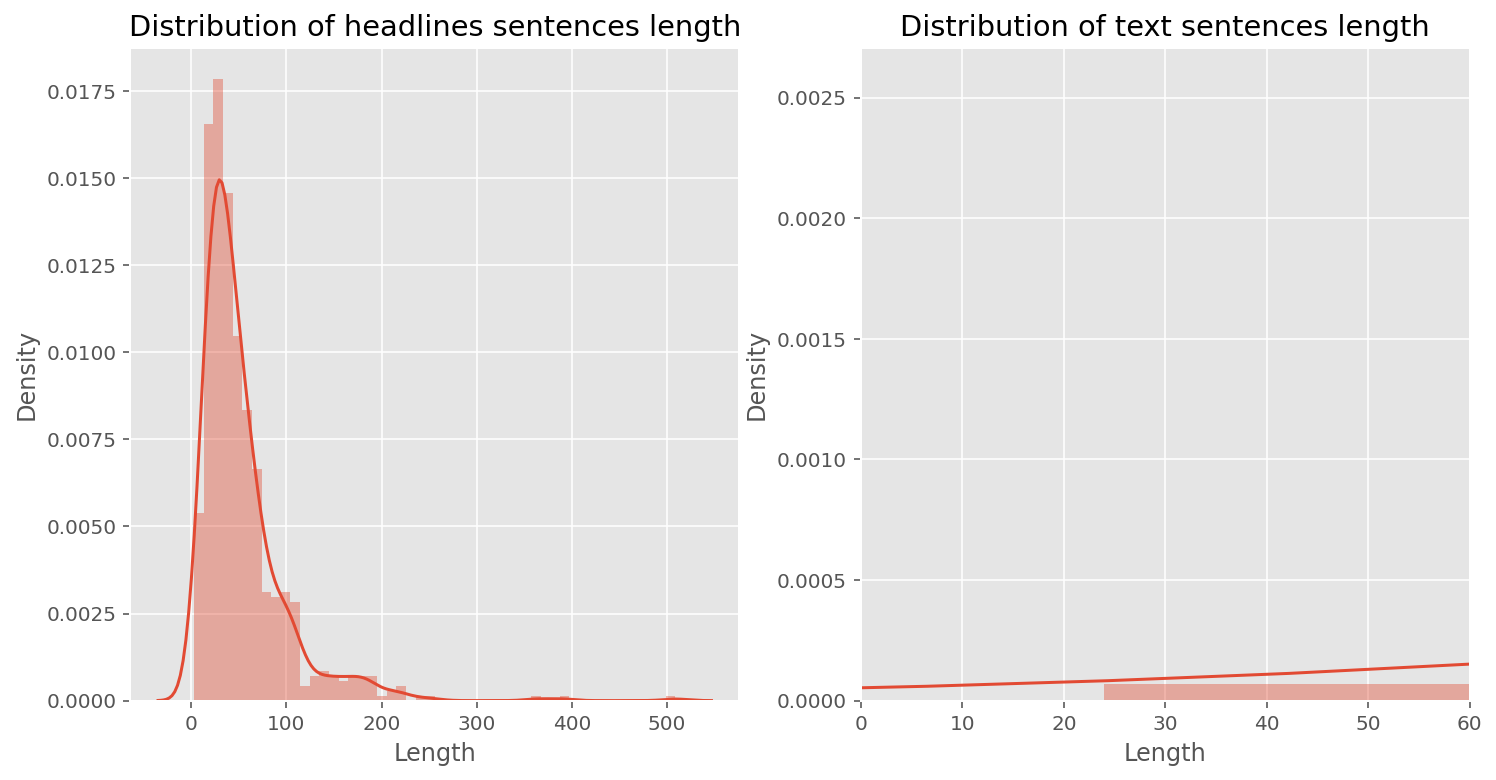

In [11]:
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
plt.subplot(1, 2, 1)
sns.distplot(df['Summary'].str.split().apply(len))
plt.title('Distribution of headlines sentences length')
plt.xlabel('Length')

plt.style.use('ggplot')
plt.subplot(1, 2, 2)
sns.distplot(df['Text'].str.split().apply(len))
plt.xlim(0,60)
plt.title('Distribution of text sentences length')
plt.xlabel('Length')
plt.show()

In [76]:
df['headlines'] = cleaned_df.headlines.apply(lambda x: 'sostok '+str(x) + ' eostok')

In [77]:
cleaned_df.head()

,headlines,text
0,sostok daman diu revokes mandatory rakshabandh...,the administration of union territory daman an...
1,sostok malaika slams user who trolled her for ...,malaika arora slammed an instagram user who tr...
2,sostok virgin now corrected to unmarried in ig...,the indira gandhi institute of medical science...
3,sostok aaj aapne pakad liya let man dujana bef...,lashkaretaibas kashmir commander abu dujana wh...
4,sostok hotel staff to get training to spot sig...,hotels in maharashtra will train their staff t...


In [78]:
cleaned_df['len_headlines'] = cleaned_df.headlines.apply(lambda x: len(x.split()))
cleaned_df['len_text'] = cleaned_df.text.apply(lambda x:len(x.split()))

#### here for deciding the length of the text we need to understand the distribution of the graph

In [79]:
# calculation the word count of text and getting percentile vlaues
for i in range(80,100,5):
    var = cleaned_df['len_headlines'].values
    var = np.sort(var, axis = None)
    print('{} percentile value is {}'.format(i, var[int(len(var)*(float(i)/100))]))
    print(("100 percentile value is ", var[-1]))

80 percentile value is 12
('100 percentile value is ', 19)
85 percentile value is 13
('100 percentile value is ', 19)
90 percentile value is 13
('100 percentile value is ', 19)
95 percentile value is 13
('100 percentile value is ', 19)


In [80]:
max_len_text  = 60

max_len_headlines = 15


#### This is most important step to filter out those sentences who follows condition

In [81]:
cleaned_df = cleaned_df[(cleaned_df.len_text <=60)*(cleaned_df.len_headlines <= 15)]

In [82]:
cleaned_df.shape

(102053, 4)

In [83]:
cleaned_df.len_text.max()

60

#### Dividing our data for train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
df['Text'], df['Summary'], test_size = 0.2, random_state = 32, shuffle = True)

In [15]:
print(X_train.shape, y_test.shape)

(558,) (140,)


### Time to prepare data 

In [17]:

import keras 
num_words_x= 35000
num_words_y = 25000
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer(filters='|', num_words = num_words_x)
y_tokenizer = Tokenizer(filters='|', num_words = num_words_y)

x_tokenizer.fit_on_texts(df['Text'])
y_tokenizer.fit_on_texts(df['Summary'])



In [18]:
x_voc = len(x_tokenizer.word_index) + 1
y_voc = len(y_tokenizer.word_index) + 1
# this shows us the number of unique words in our text data 

In [20]:
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_train) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_test) 

#padding zero upto maximum length
# y_tr    =   pad_sequences(y_tr_seq, maxlen=max_len_headlines, padding='post')
# y_val   =   pad_sequences(y_val_seq, maxlen=max_len_headlines, padding='post')

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(y_tr_seq) 
x_val_seq   =   x_tokenizer.texts_to_sequences(y_val_seq)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_len_text, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_len_text, padding='post')

AttributeError: 'int' object has no attribute 'lower'

In [93]:
print(x_tr.shape, y_tr.shape)

(81642, 60) (81642, 15)


### We are going to use word embedding (glove vectors ) 

In [94]:
## using 300 dimension word2vec model, since more dimension means more information
glove_vectors = {}
file = open('../input/glove6b/glove.6B.300d.txt', encoding = 'utf-8')
for line in file:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
file.close()   

#### if word not available in our glove vector then that word will get 0 weightage

In [95]:
glove_emb_matrix = np.zeros((num_words_x,300))
glove_emb_matrix.shape

(35000, 300)

In [96]:
%%time
for word, index in x_tokenizer.word_index.items():
    if index < num_words_x: # since index starts with zero 
        embedding_vector = glove_vectors.get(word)
        if embedding_vector is not None:
            glove_emb_matrix[index] = embedding_vector
    

CPU times: user 5.48 s, sys: 15.1 ms, total: 5.49 s
Wall time: 5.5 s


#### **i'm not applying word2vec in decoder phase becuase y_train have not that big corpus or not having that much big words vocabulary, and word embedding gives us more generalised and excellent model and accuracy **

### Importing libraries for designing our architecture 

In [21]:
from tensorflow.keras import models
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional,Concatenate
from tensorflow.keras.layers import Dense, Flatten,Embedding
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from keras.layers import Input,Dense, Activation, concatenate, Embedding, Flatten, Bidirectional, Concatenate
 
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from keras import optimizers


### This is attention layer and can be used in teacher forcing

In [22]:
# now we will have to make attention classs
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        
        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [23]:
y_tr.shape

NameError: name 'y_tr' is not defined

### lets design our model architecture for training

In [24]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(num_words_x, 300,input_length = x_tr.shape[1],
                    trainable = False, weights = [glove_emb_matrix])(encoder_inputs) 

encoder_lstm_layer = Bidirectional(LSTM(latent_dim, return_state=True, return_sequences = True, 
                                             name = 'lstm_encoder'), merge_mode = 'concat')

encoder_output, forward_h, forward_c, backward_h, backward_c = encoder_lstm_layer(enc_emb)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(num_words_y,latent_dim, input_length=y_tr.shape[1],trainable  = True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm_layer = LSTM(2*latent_dim, return_state=True, return_sequences = True, name = 'lstm_decoder')
decoder_output , decoder_h, decoder_c = decoder_lstm_layer(dec_emb,
                                                   initial_state = encoder_states)

attn_layer = AttentionLayer(name = 'attention_layer')

######### -------------Attention layer---------------------------
attn_out, attn_states = attn_layer([encoder_output, decoder_output])
decoder_concat_input = Concatenate(axis=-1, name='concat')([decoder_output, attn_out])



#Dense layer
decoder_dense = TimeDistributed(Dense(num_words_y, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 


model = Model([encoder_inputs,decoder_inputs], decoder_outputs) 
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')                                                          
# using sparse_categorical entropy will solve memory problem                                                          
model.summary()

NameError: name 'max_len_text' is not defined

stacked decoder more often need more epochs for training so for now we will not use them


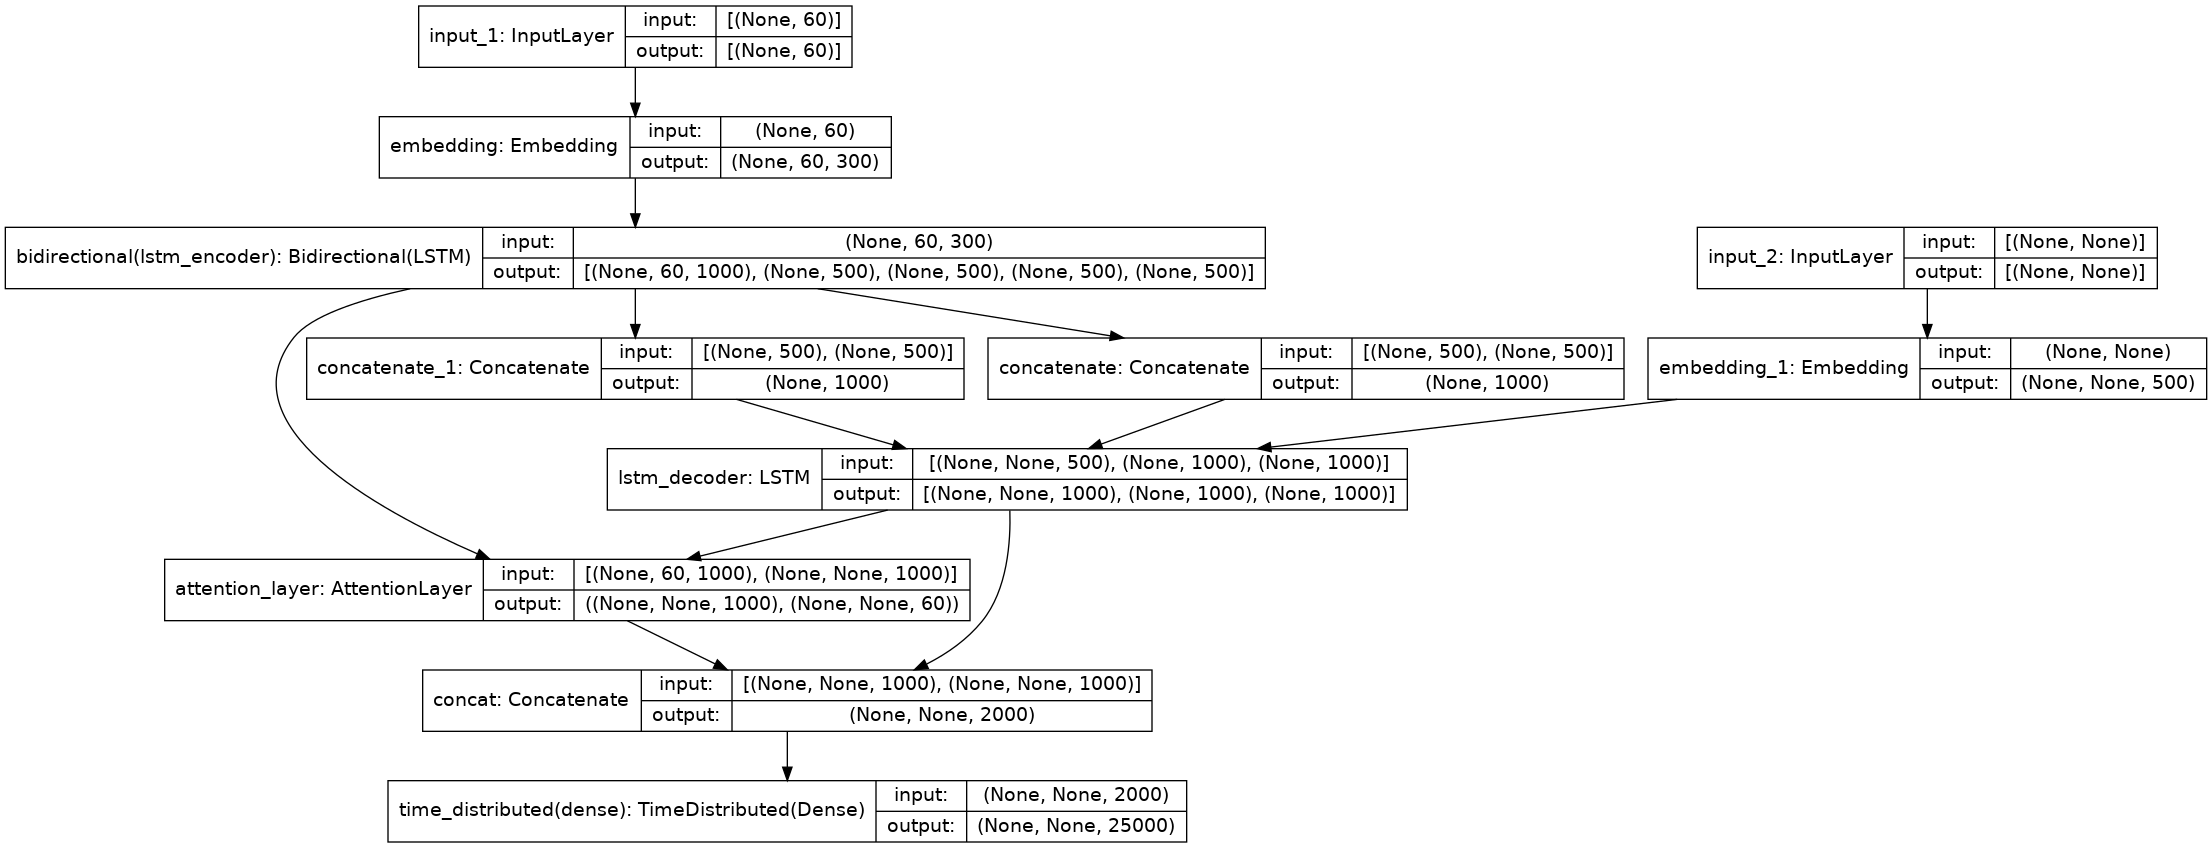

In [103]:
plot_model(model, to_file='model.png', show_shapes=True)

In [104]:
## defining callbacks 
es = EarlyStopping(monitor='val_loss',patience = 10, mode='min', verbose=1)
lr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 1, mode = 'min', verbose = 1)


In [105]:
print(x_tr.shape, y_tr.shape)

(81642, 60) (81642, 15)


In [106]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=10,
                  callbacks=[es,lr],
                  batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/10
638/638 [==============================] - 204s 311ms/step - loss: 5.0298 - val_loss: 3.8305
Epoch 2/10
638/638 [==============================] - 196s 307ms/step - loss: 3.5412 - val_loss: 3.3717
Epoch 3/10
638/638 [==============================] - 195s 306ms/step - loss: 2.9287 - val_loss: 3.1297
Epoch 4/10
638/638 [==============================] - 196s 307ms/step - loss: 2.4776 - val_loss: 3.0219
Epoch 5/10
638/638 [==============================] - 196s 308ms/step - loss: 2.1140 - val_loss: 2.9680
Epoch 6/10
638/638 [==============================] - 196s 308ms/step - loss: 1.8037 - val_loss: 2.9628
Epoch 7/10
638/638 [==============================] - 196s 308ms/step - loss: 1.5499 - val_loss: 2.9812

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 8/10
638/638 [==============================] - 196s 307ms/step - loss: 1.1876 - val_loss: 2.9528
Epoch 9/10
638/638 [==============================] - 197s 309ms/step - loss: 1.0421 -

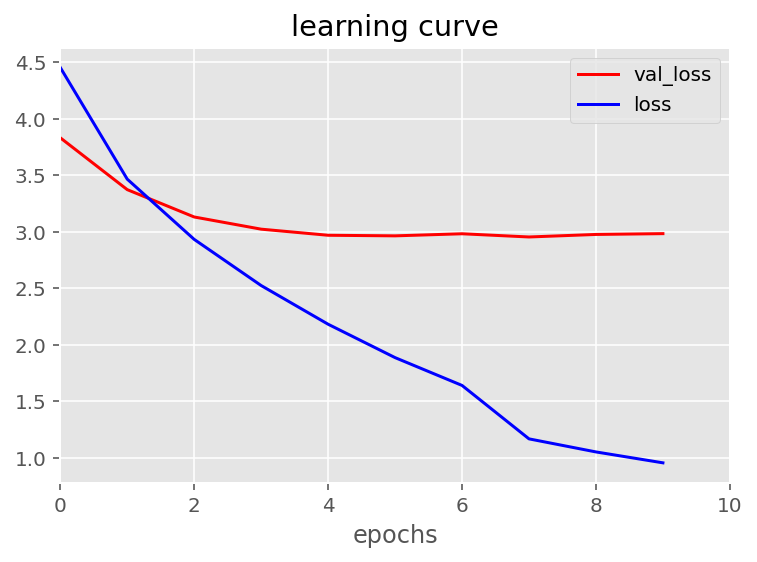

In [119]:
plt.plot(history.history['val_loss'], color = 'r')
plt.plot(history.history['loss'], color = 'b')
plt.legend(['val_loss','loss'])
plt.xlim(0,10)
plt.xlabel('epochs')
plt.title('learning curve')
plt.show()

### Inference Model 

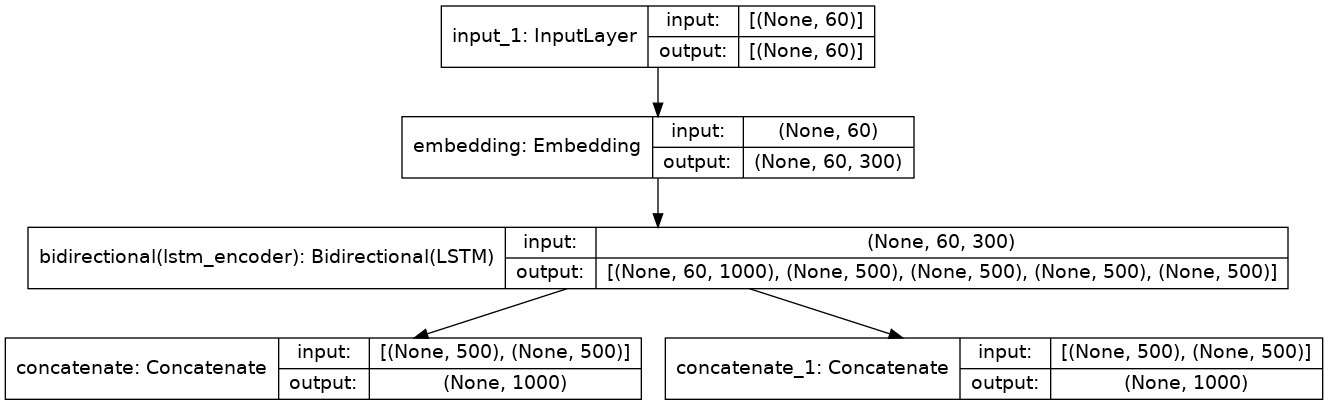

In [109]:
# Define inference model
encoder_model = Model(encoder_inputs, [encoder_output,state_h, state_c])
plot_model(encoder_model,show_shapes=True)



In [110]:

# now lets design our decoder model 
decoder_state_input_h = Input(shape=(2*latent_dim,))  # These states are required for feeding back to our next timestep decoder
decoder_state_input_c = Input(shape=(2*latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_hidden_state_input = Input(shape=(max_len_text,2*latent_dim)) # since we are using bidirectional lstm


# Get the embeddings of the decoder sequence
dec_emb= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_output, state_h2, state_c2 = decoder_lstm_layer(dec_emb, initial_state=decoder_states_inputs)

attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_output])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_output, attn_out_inf])


# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs] + [state_h2, state_c2])

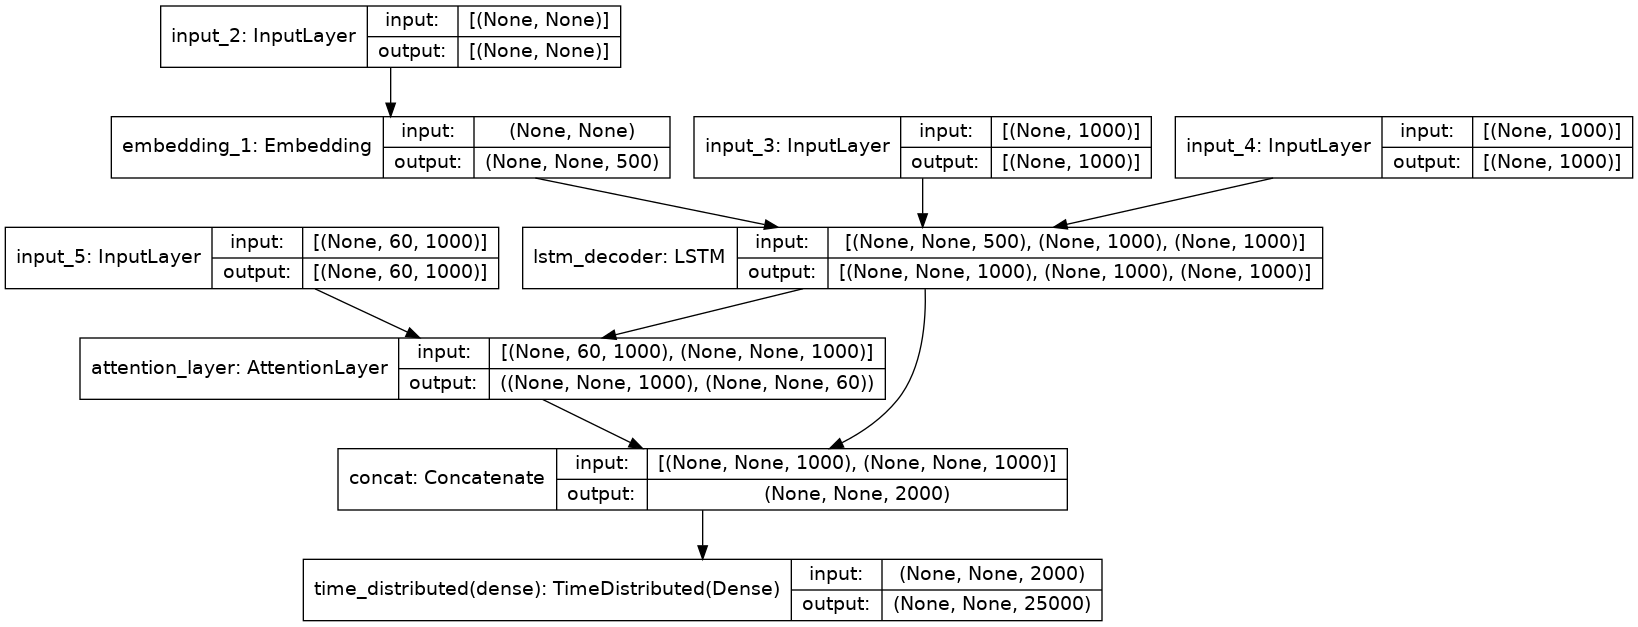

In [111]:
plot_model(decoder_model,show_shapes = True)

In [112]:
# defined a new variable to change words2index nd index2words
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [113]:
# function for prediction of whole sentence by using loop
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out,e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out,e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_len_headlines-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [114]:
x_val[0].shape

(60,)

In [115]:
## Testing phase 
decode_sequence(np.array(x_val[0]).reshape(1,60))

' govt doubles import duty on products to boost bn'

In [116]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [117]:
for i in range(0,100):
    print("Review:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
    print("\n")

Review: the government on tuesday doubled the import duty on as many as textile products to to boost local production indias total textile imports jumped by to record billion last fiscal of which billion were from china the government increased the import duty on other products including fibre and apparels last month 
Original summary: govt doubles import tax on textile products to 
Predicted summary:  govt doubles import duty on products to boost bn


Review: telecom regulatory authority of india trai on tuesday gave recommendations on internet telephony on mobile operators network and having provision for making calls by using wifi networks trai pitched internet calling as useful and costeffective alternative for making voice calls and medium to obtain connectivity during calls in case of an inadequate mobile signal 
Original summary: make provisions for wifi calls trai to mobile operators 
Predicted summary:  trai asks up for internet network on internet network


Review: indian bat